# 0. 加载必要的数据库

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# 1. 加载数据

In [2]:
# 定义转换
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# 加载数据集
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32, shuffle=True)

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32, shuffle=False)


# 2. 构建一个较为复杂的模型

In [3]:
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.fc1 = nn.Linear(in_features=16*4*4, out_features=120)
        self.fc2 = nn.Linear(in_features=120, out_features=10) # 十分类 0-9

    def forward(self, x):
        x = torch.relu(self.conv1(x))
        x = torch.max_pool2d(x, 2)
        x = torch.relu(self.conv2(x))
        x = torch.max_pool2d(x, 2)
        x = x.view(-1, 16*4*4)
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# 加载和预处理数据
transform = transforms.Compose([
    transforms.Resize((32, 32)),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

# 创建模型
net = LeNet5()

# 3. 损失函数和优化器

In [4]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

# 4. 训练模型

In [5]:
for epoch in range(5):  # 训练5个epoch
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data

        # 零梯度
        optimizer.zero_grad()

        # 正向传播, 反向传播, 优化
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # 打印统计信息
        running_loss += loss.item()
        if i % 100 == 99:    # 每100个小批量打印一次
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 100:.3f}')
            running_loss = 0.0

print('Finished Training')


[Epoch 1, Batch 100] loss: 1.142
[Epoch 1, Batch 200] loss: 0.370
[Epoch 1, Batch 300] loss: 0.255
[Epoch 1, Batch 400] loss: 0.202
[Epoch 1, Batch 500] loss: 0.167
[Epoch 1, Batch 600] loss: 0.135
[Epoch 1, Batch 700] loss: 0.126
[Epoch 1, Batch 800] loss: 0.131
[Epoch 1, Batch 900] loss: 0.115
[Epoch 1, Batch 1000] loss: 0.123
[Epoch 1, Batch 1100] loss: 0.122
[Epoch 1, Batch 1200] loss: 0.102
[Epoch 1, Batch 1300] loss: 0.082
[Epoch 1, Batch 1400] loss: 0.098
[Epoch 1, Batch 1500] loss: 0.097
[Epoch 1, Batch 1600] loss: 0.083
[Epoch 1, Batch 1700] loss: 0.091
[Epoch 1, Batch 1800] loss: 0.093
[Epoch 2, Batch 100] loss: 0.055
[Epoch 2, Batch 200] loss: 0.084
[Epoch 2, Batch 300] loss: 0.076
[Epoch 2, Batch 400] loss: 0.071
[Epoch 2, Batch 500] loss: 0.064
[Epoch 2, Batch 600] loss: 0.065
[Epoch 2, Batch 700] loss: 0.061
[Epoch 2, Batch 800] loss: 0.067
[Epoch 2, Batch 900] loss: 0.065
[Epoch 2, Batch 1000] loss: 0.068
[Epoch 2, Batch 1100] loss: 0.064
[Epoch 2, Batch 1200] loss: 0.06

# 5. 评估模型

In [6]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total} %')


Accuracy of the network on the 10000 test images: 99.03 %


# 6. 可视化

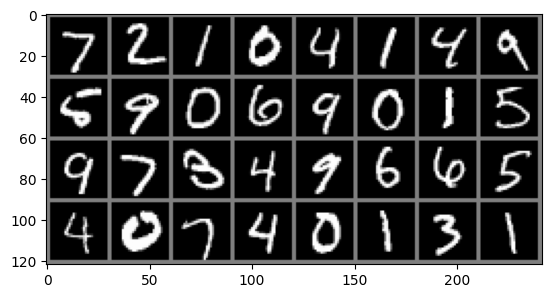

GroundTruth: 
7 2 1 0 4 1 4 9
5 9 0 6 9 0 1 5
9 7 3 4 9 6 6 5
4 0 7 4 0 1 3 1
Predicted: 
7 2 1 0 4 1 4 9
5 9 0 6 9 0 1 5
9 7 3 4 9 6 6 5
4 0 7 4 0 1 3 1


In [7]:
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# 获取一些随机数据
dataiter = iter(testloader)
images, labels = next(dataiter)

# 显示全部图片
imshow(torchvision.utils.make_grid(images))

# Calculate the number of rows needed to print all labels, assuming 8 labels per row
num_rows = len(labels) // 8 + (1 if len(labels) % 8 > 0 else 0)

# 打印真实标签
print('GroundTruth: ')
for i in range(num_rows):
    print(' '.join(f'{labels[i * 8 + j].item()}' for j in range(min(8, len(labels) - i * 8))))

# 预测
outputs = net(images)
_, predicted = torch.max(outputs, 1)

# 打印预测结果
print('Predicted: ')
for i in range(num_rows):
    print(' '.join(f'{predicted[i * 8 + j].item()}' for j in range(min(8, len(predicted) - i * 8))))


# 7. 保存模型和参数

我们的网络训练完成后，如果表现还不错，通常会想到把模型保存起来。所谓的模型，指的是我们用什么的神经层构建的网络，而与模型一同进行保存的，还有与模型相关的参数解。

所以从这个概念出发，我们可以有两种保存和读取方法。

## S/L 模型

这种会把模型和相关参数一起保存起来，这种做法能很方便我们在做其他工程时，把之前的网络集成到新的应用里。

```python
# save the model 
torch.save(the_model, PATH)

# load the model
the_model = torch.load(PATH)
```

但是它会有个缺点，就是保存的文件体积特别大，因为它不光保存了模型，也保留了相关参数。所以有时候我们会想，如果我们已知了某种网络结构，是否可以只保留参数？

## S/L 参数
这便是上面提到的第二种方法，就是仅存储模型的训练参数，这种方法有个前置条件，就是要求使用者已知网络模型。

```python
# save the arguments
torch.save(the_model.state_dict(), PATH)

# load the arguments
the_model = TheModelClass(*args, **kwargs)
the_model.load_state_dict(torch.load(PATH))
```

在某些时候，我们也可以使用这个方法来调整网络的预训练模型。

## TorchScript 

以上两种方法，适用于Python对Python的项目，如果是Python对C/CPP，Python对Java的项目，就不能使用上面提到的两种方法。

这时我们会使用第三种，把模型以TorchScript的形式进行保存，并加载。比方说我们训练了一个网络模型，它能识别文字信息，现在我们需要把相关任务以TorchScript的形式进行保存，这样就可以集成到比如C/C++程序，或者Java程序里。

### Pytorch模型转成TorchScript

~~~python
	# define a neural network module
	model = DefinedNeuralNetworkModule

    # converting to Torch Script via Annotation
    serialized_model = torch.jit.script(model)

    # save the torch script for C++
    serialized_model.save("LSTM_Classfication.pt")
~~~

### C/C++加载TorchScript

~~~cpp
    torch::jit::script::Module module;
    try {
        // Deserialize the ScriptModule from a file using torch::jit::load().
        module = torch::jit::load(argv[1]);
    }
    catch (const c10::Error& e) {
        std::cerr << "error loading the model." << std::endl;
        return -1;
    }
~~~


In [8]:
# Convert the model to TorchScript
serialized_model = torch.jit.script(net)

# Save the model to a file
torch.jit.save(serialized_model, 'lenet5.pt')

验证模型是否可以被加载，并直接进行推理

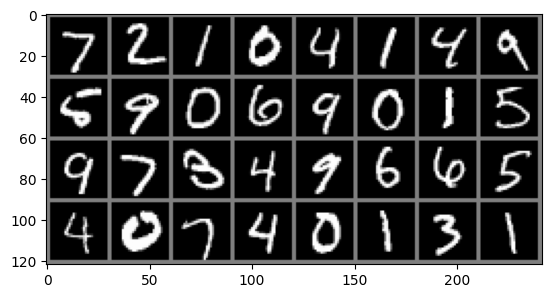

Predicted from loaded model:
7 2 1 0 4 1 4 9
5 9 0 6 9 0 1 5
9 7 3 4 9 6 6 5
4 0 7 4 0 1 3 1


In [10]:
# Load the model from the file
loaded_model = torch.jit.load('lenet5.pt')

# Make predictions with the loaded model
outputs = loaded_model(images)

# Get the predicted classes
_, predicted = torch.max(outputs, 1)

# Display the images
imshow(torchvision.utils.make_grid(images))

# Print the predicted classes
print('Predicted from loaded model:')

for i in range(num_rows):
    print(' '.join(f'{predicted[i * 8 + j].item()}' for j in range(min(8, len(predicted) - i * 8))))